In [1]:
import os

#add the root directory
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from tools import *
from loader import *
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import matplotlib.colors as colors

<h2>Visualize all the species in layer 10

In [3]:
data_path = 'data-files/'
chosen_layer = 10
files = [i for i in listdir(data_path) if isfile(join(data_path + i))]

count_species = 0
Not_species = ["T","U","V","W", "X","Z"]
list_species = []
species_names = []

for file in files:
    #if name of the file is not starting with an uppercase
    if(not file[0] == "R" and file[0].isupper() and file[0] not in Not_species):
        print(file)
        list_species.append(file)
        species_names.append(file.removesuffix('_3D_slice.mat'))
        count_species += 1

print()
print(f"Number of source terms: {count_species}")
print(species_names)

H2NN_3D_slice.mat
H2O2_3D_slice.mat
H2O_3D_slice.mat
H2_3D_slice.mat
HNO_3D_slice.mat
HO2_3D_slice.mat
HONO2_3D_slice.mat
HONO_3D_slice.mat
H_3D_slice.mat
N2H3_3D_slice.mat
N2O_3D_slice.mat
N2_3D_slice.mat
NH2_3D_slice.mat
NH_3D_slice.mat
NNH_3D_slice.mat
NO2_3D_slice.mat
NO_3D_slice.mat
N_3D_slice.mat
O2_3D_slice.mat
OH_3D_slice.mat
O_3D_slice.mat

Number of source terms: 21
['H2NN', 'H2O2', 'H2O', 'H2', 'HNO', 'HO2', 'HONO2', 'HONO', 'H', 'N2H3', 'N2O', 'N2', 'NH2', 'NH', 'NNH', 'NO2', 'NO', 'N', 'O2', 'OH', 'O']


2025-04-29 10:52:39 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-04-29 10:52:39 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-04-29 10:52:39 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-04-29 10:52:39 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\Admin\\Documents\\Parente\\Programming\\venvPV\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2025-04-29 10:52:39 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\Admin\\Documents\\Parente\\Programming\\venvPV\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-04-29 10:52:39 - DEBUG - findfont: score(Fo

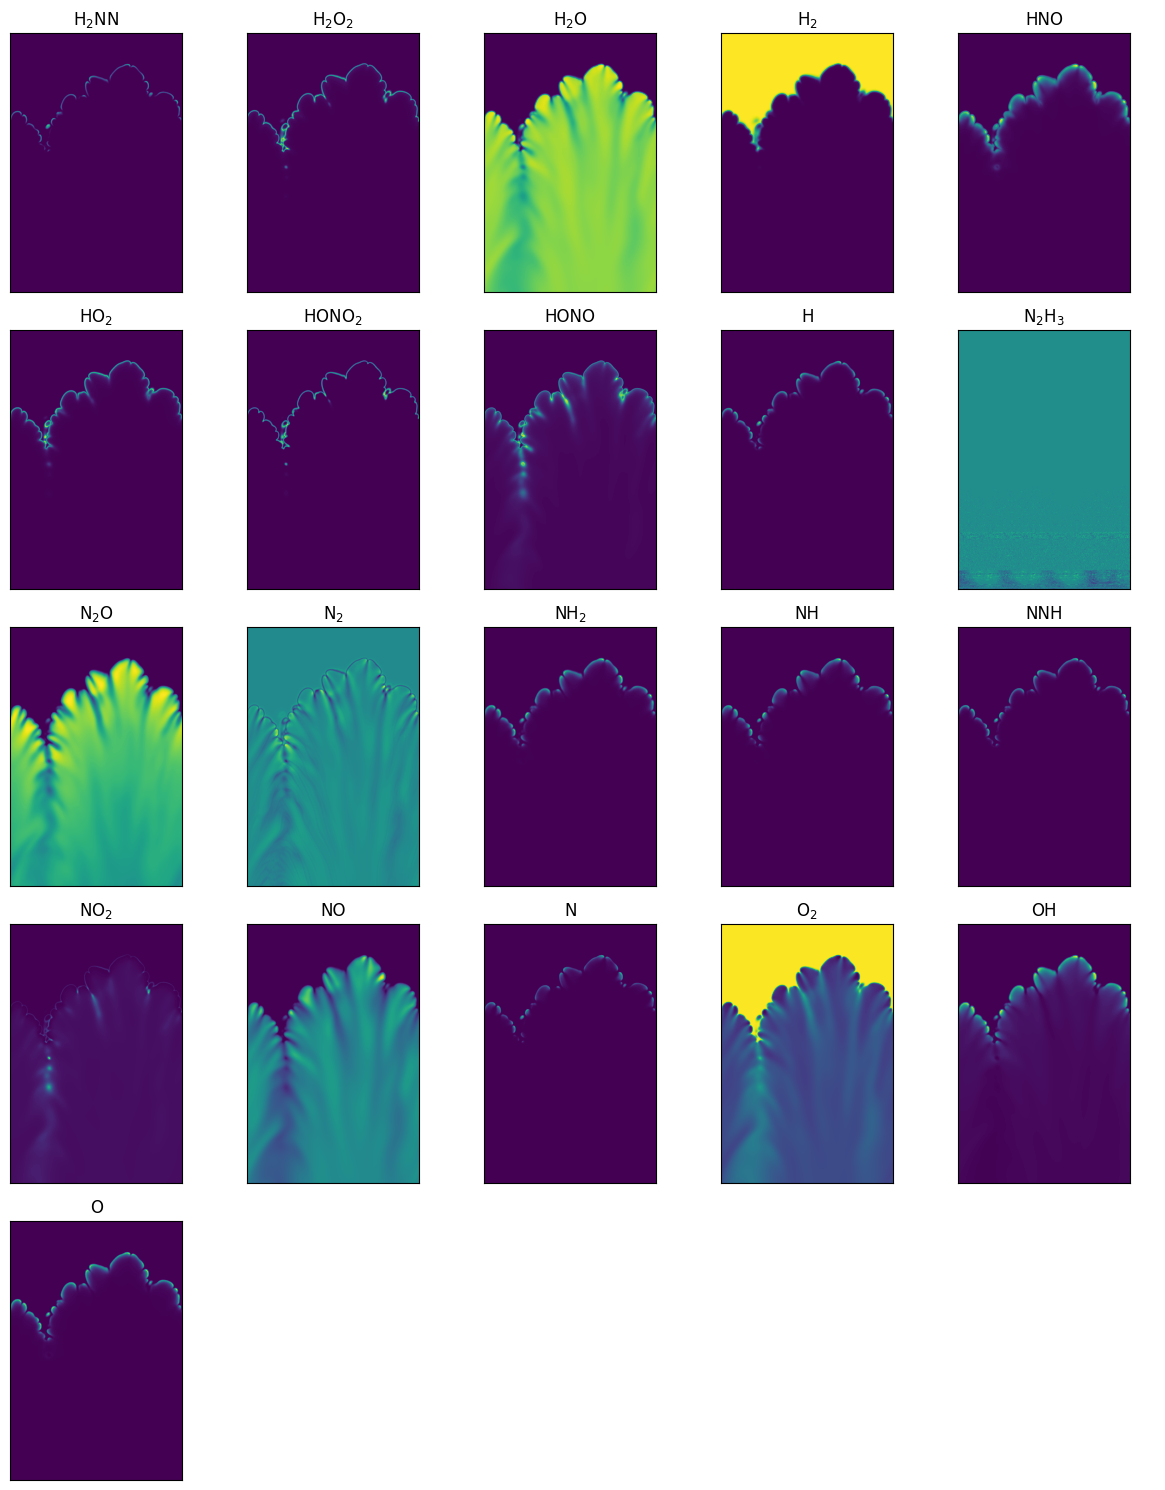

In [ ]:
nbr_row = 5
nbr_col = 5

fig, axs = plt.subplots(nbr_row, nbr_col, figsize=(12, 15))

counter = 0

for species in species_names:
    row = int(np.floor(counter/nbr_col))
    col = counter%nbr_col

    matrix = load_matrix(data_path, species, chosen_layer)

    axs[row, col].imshow(matrix, cmap='viridis')
    axs[row, col].set_title(species_names[counter].replace('2', r'$_2$').replace('3', r'$_3$'))

    counter += 1
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])

for j in range(1,5):
    i = 4
    axs[i, j].axis('off')

plt.tight_layout()
plt.show()

Visualize the mixture fraction and the progress variable in the layer

In [8]:
data_path = 'data-files/'
nbr_species = 21
nbr_rows = 1536
nbr_cols = 1024

layer = 10 #chose layer to inspect

state_space_names = []
state_space_source_names = [] #to check it is the same order as the state space
Not_species = ["T","U","V","W","X","Z"]
state_space = np.zeros((1,nbr_species))
data_state_space = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_state_space_source = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_mf = np.zeros((nbr_rows*nbr_cols,1))
data_T = np.zeros((nbr_rows*nbr_cols,1))

counter_state_space = 0
counter_state_space_source = 0

for file in files:
    if file.endswith('.mat'):
        print(f"Busy with {file}")

        data = loadmat(data_path + file)

        filename = file.removesuffix('.mat')
        file_data = np.array(data[filename])
        

        #if name of the file is not starting with an uppercase
        if(not file[0] == "R" and file[0].isupper() and file[0] not in Not_species):
            state_space_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space[:,counter_state_space] = flattened_data

            counter_state_space+=1

        elif(file[0] == "R"):
            state_space_source_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space_source[:,counter_state_space_source] = flattened_data

            counter_state_space_source+=1

        elif(file[0] == "Z"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_mf[:,0] = flattened_data
            
            print()
            print("mass fraction data done")
            print()

        elif(file[0] == "T"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_T[:,0] = flattened_data
            
            print()
            print("Temperature data done")
            print()

print(state_space_names)
print(f"counters of state space and sources are {counter_state_space} and {counter_state_space_source}")

Busy with curvature_Condi_3D_slices.mat
Busy with H2NN_3D_slice.mat
Busy with H2O2_3D_slice.mat
Busy with H2O_3D_slice.mat
Busy with H2_3D_slice.mat
Busy with HNO_3D_slice.mat
Busy with HO2_3D_slice.mat
Busy with HONO2_3D_slice.mat
Busy with HONO_3D_slice.mat
Busy with H_3D_slice.mat
Busy with N2H3_3D_slice.mat
Busy with N2O_3D_slice.mat
Busy with N2_3D_slice.mat
Busy with NH2_3D_slice.mat
Busy with NH_3D_slice.mat
Busy with NNH_3D_slice.mat
Busy with NO2_3D_slice.mat
Busy with NO_3D_slice.mat
Busy with N_3D_slice.mat
Busy with O2_3D_slice.mat
Busy with OH_3D_slice.mat
Busy with O_3D_slice.mat
Busy with RH2NN_3D_slice.mat
Busy with RH2O2_3D_slice.mat
Busy with RH2O_3D_slice.mat
Busy with RH2_3D_slice.mat
Busy with RHNO_3D_slice.mat
Busy with RHO2_3D_slice.mat
Busy with RHONO2_3D_slice.mat
Busy with RHONO_3D_slice.mat
Busy with RH_3D_slice.mat
Busy with RN2H3_3D_slice.mat
Busy with RN2O_3D_slice.mat
Busy with RN2_3D_slice.mat
Busy with RNH2_3D_slice.mat
Busy with RNH_3D_slice.mat
Busy w

In [ ]:
# Define heuristic and optimized PV

PV_Xu = data_state_space[:,2] - data_state_space[:,3] - data_state_space[:,18]
PV_Xu = (PV_Xu - PV_Xu.min())/(PV_Xu.max() - PV_Xu.min())
PV_source_Xu = data_state_space_source[:,2] - data_state_space_source[:,3] - data_state_space_source[:,18]

filename = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s3"
filename_metadata = filename + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["idx species removed"]
model = loader.loadModel()
id_model = loader.metadata["Training_id"]
output_idx = loader.metadata["output species idx"]
idx_species_removed = loader.metadata["idx species removed"]
input_scaling = loader.metadata["input scaling"]
input_species_scaling = loader.metadata["input species scaling"]
input_species_bias = loader.metadata["input species bias"]
range_mf  = loader.metadata["range_mf"]

optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()

Concatenate the species together

2025-04-29 12:28:03 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001AC4F27B2E0>
C:\Windows\Temp\ipykernel_14488\2777651749.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.9])


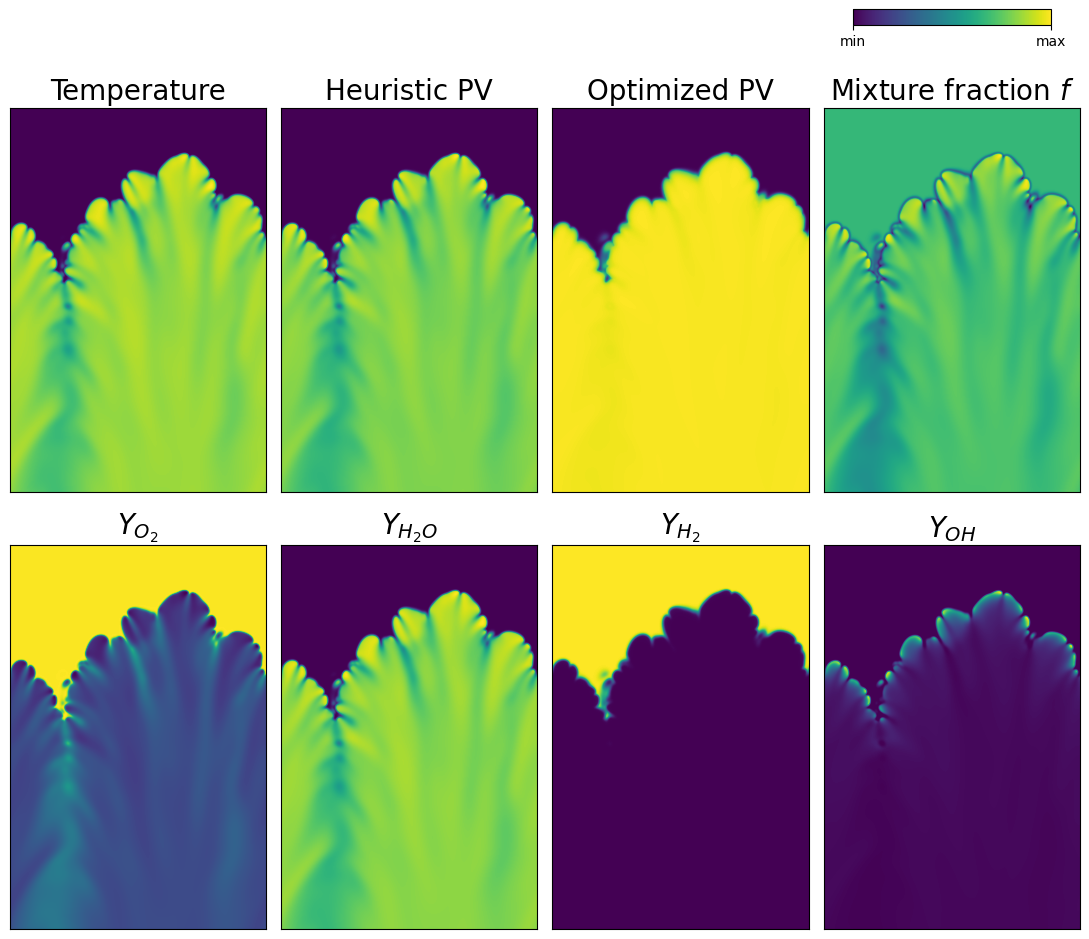

In [21]:
save = True
pathSave = "C:/Users/Admin/Documents/Parente/Figures/2024-PV-optimization/Paper/A priori/"
nameFig = "PVs, mf and species in physical domain with OHn O2, T"

fig, axes = plt.subplots(2, 4, figsize=(11, 10.5))

# First row
matrix = load_matrix(data_path, "T", chosen_layer)
axes[0, 0].imshow(matrix, cmap='viridis')
axes[0, 0].set_title("Temperature", fontsize = 20)

axes[0, 1].imshow(PV_Xu.reshape((1536, 1024)), cmap='viridis')
axes[0, 1].set_title("Heuristic PV", fontsize = 20)

axes[0, 2].imshow(optimized_PV.reshape((1536, 1024)), cmap='viridis')
axes[0, 2].set_title("Optimized PV", fontsize = 20)

matrix = load_matrix(data_path, "ZBilger", chosen_layer)
axes[0, 3].imshow(matrix, cmap='viridis')
axes[0, 3].set_title("Mixture fraction $f$", fontsize = 20)

# Second row

matrix = load_matrix(data_path, "O2", chosen_layer)
axes[1, 0].imshow(matrix, cmap='viridis')
axes[1, 0].set_title("$Y_{O_2}$", fontsize = 20)

matrix = load_matrix(data_path, "H2O", chosen_layer)
axes[1, 1].imshow(matrix, cmap='viridis')
axes[1, 1].set_title("$Y_{H_2O}$", fontsize = 20)

matrix = load_matrix(data_path, "H2", chosen_layer)
axes[1, 2].imshow(matrix, cmap='viridis')
axes[1, 2].set_title("$Y_{H_2}$", fontsize = 20)

matrix = load_matrix(data_path, "OH", chosen_layer)
axes[1, 3].imshow(matrix, cmap='viridis')
axes[1, 3].set_title("$Y_{OH}$", fontsize = 20)


# Optional: turn off axis ticks
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

cbar_ax = fig.add_axes([0.78, 0.92, 0.18, 0.015])  # [left, bottom, width, height]
norm = colors.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['min', 'max'])

plt.tight_layout(rect=[0, 0, 1, 0.9])
if(save):
    plt.savefig(pathSave + nameFig, dpi = 300, bbox_inches = "tight")
plt.show()